# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Beatriz Rogers Tripoli Barbosa

**RA**: 792170 

**Nome**: Laura Naomi Seto

**RA**: 813210


---
## Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

### Análise dos atributos

A seguir, estão listados todos os atributos provenientes da base de dados, com seus respectivos problemas em potencial identificados em uma análise prévia:

* **Id**: Identificação única do registro.

* **Peso**: Peso corporal do paciente [kg]
    * valores faltantes

* **Altura**: Altura do paciente [cm]
    * valores fora do intervalo aceitável (0 é válido?)

* **Índice de Massa Corporal** (IMC): $$\frac{Peso}{Altura^2}$$    
    * valores fora do intervalo válido
    * valores faltantes acarretados por: peso ou altura não registrados ou igual a 0

* **Atendimento**: Data de atendimento [DD/MM/AA]
    * valores inválidos

* **Data de Nascimento** (DN): Data de nascimento [DD/MM/AA]
    * valores faltantes
    * valores inválidos

* **Idade**: Idade no momento do atendimento [anos]
    * valores não numéricos ('#VALUE!') acarretados por: atendimento e/ou data de nascimento inválidos 
    * valores fora do intervalo aceitável (idades negativas e pacientes não pediátricos)
    * valores faltantes acarretados por: data de nascimento não registrado
    * valores aparentemente válidos mas atendimento e/ou data de nascimento inválidos

* **Convênio**: Tipo de plano de saúde utilizado para o atendimento

* **Pulsos**: Avaliação da presença e qualidade dos pulsos arteriais [normais, outro, amplos, femorais diminuidos, diminuídos]
    * adotar formas canônicas para os valores possíveis
    * tratamento por moda baseado na classe
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **PA Sistólica**: Valor mais alto registrado durante o batimento cardíaco [mmHg]
    * valores fora fora do intervalo aceitável
    * valores faltantes

* **PA Diastólica**: Valor mais baixo registrado entre os batimentos cardíacos [mmHg]
    * valores fora do intervalo aceitável
    * valores faltantes 

* **Pressão de Pulso Arterial** (PPA): [normal, pre-hipertensão pas, pre-hipertensão pad, has-1 pas, has-1 pad, has-2 pas, has-2 pad]
    * valor inválido ('#VALUE!')
    * conversão simbólico-numérico com label encoding (ordinal)

* **B2**: Segundo som cardíaco [normal, desdob fixo, outro, hiperfonética, única]
    * valores fantantes
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Sopro**: Sopro cardíaco [ausente, sistólico, diastólico, contínuo, 'sistolico e diastólico']
    * adotar formas canônicas para os valores possíveis 
    * conversão simbólico-numérico com label encoding (ordinal): progressão de anormalidade e gravidade

* **Frequência Cardíaca** (FC): Número de batimentos cardíacos por minuto [bpm]
    * valores faltantes
    * valores fora do intervalo aceitável
    * adotar forma canônica para os valores (ex: 123 ou 100-130)
        * valores não numéricos transformados em NaN
        
* **História da Doença Atual 1** (HDA 1): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **História da Doença Atual 2** (HDA2): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * REMOVIDA: 96% dos registros tinham este campo não preenchido

* **Sexo**: Gênero biológico do paciente [masculino, feminino e indeterminado]
    * adotar formas canônicas para os valores possíveis
    * tratamento por moda
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 1**: Principal motivo para o atendimento ['6 - Suspeita de cardiopatia', '2 - Check-up', '5 - Parecer cardiológico', '1 - Cardiopatia já estabelecida', nan, '7 - Outro']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 2**: Motivo secundário para o atendimento ['6 - Palpitação/taquicardia/arritmia', '6 - Dispnéia', nan, '5 - Atividade física', '5 - Cirurgia', '6 - Sopro', '1 - Cardiopatia adquirida', '1 - Cardiopatia congenica', '6 - Dor precordial', '6 - HAS/dislipidemia/obesidade', '6 - Cianose', 'Outro', '6 - Alterações de pulso/perfusão', '6 - Cardiopatia na familia', '6 - Cansaço', '5 - Uso de cisaprida', '6 - Cianose e dispnéia']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Classe**: [normal, anormal]
    * adotar formas canônicas para os valores possíveis

In [30]:
# biblioteca usada para trabalhar com vetores e matrizes
import numpy as np 

# biblioteca usada para trabalhar com dataframes e análise de dados
import pandas as pd

# bibliotecas usadas para geração de graficos
import seaborn as sns
import matplotlib.pyplot as plt

# importando scripts 
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *
from scripts.experimentos import *


print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


In [31]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data/RHP_data.csv', sep=',', index_col=None) 

# TREINO
df_train_id = pd.read_csv('data/train.csv', sep=',', index_col=None)

# TESTE
df_test_id = pd.read_csv('data/test.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


In [32]:
# TREINO
# recuperar as partições por Id e concatenar a coluna alvo CLASSE
print("Registros de treino fornecidos: ", df_train_id.shape)
df_train = pd.merge(df_train_id, df_dataset, on='Id')
classes = df_train.pop('CLASSE')
df_train['CLASSE'] = classes
# remover os registros de treino que não possuem atributo alvo classificado
df_train = df_train.dropna(subset=['CLASSE'], axis=0).reset_index(drop=True)
print("Registros de treino classificados: ", df_train.shape)

# TESTE
df_test =  pd.merge(df_test_id, df_dataset, on='Id')
print("Registros de teste fornecidos: ", df_test.shape)

Registros de treino fornecidos:  (14727, 2)
Registros de treino classificados:  (13559, 21)
Registros de teste fornecidos:  (3146, 20)


In [33]:
# ANÁLISE DE VALORES FALTANTES
analise_valores_faltantes(df_train)
analise_valores_faltantes(df_test)

Relação de atributos e porcentagem de nulos: 


,qtd,%
Id,0.0,0.000000
Peso,252.0,1.858544
Altura,0.0,0.000000
IMC,3178.0,23.438307
Atendimento,225.0,1.659414
DN,604.0,4.454606
IDADE,604.0,4.454606
Convenio,3711.0,27.369275
PULSOS,46.0,0.339258
PA SISTOLICA,5339.0,39.376060


Relação de atributos e porcentagem de nulos: 


,qtd,%
Id,0.0,0.000000
Peso,58.0,1.843611
Altura,0.0,0.000000
IMC,710.0,22.568341
Atendimento,0.0,0.000000
DN,0.0,0.000000
IDADE,0.0,0.000000
Convenio,811.0,25.778767
PULSOS,6.0,0.190718
PA SISTOLICA,1235.0,39.256198


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

##### Abordagens
**Valores faltantes e inválidos** - analisar porcentagem de valores faltantes e natureza dos dados (numérico, categórico, temporais)
- exclusão de linha (poucos faltantes)
- exclusão de coluna (muitos faltantes)
- substituição por média, mediana (melhor quando há outliers) ou moda (dados categóricos)
- substituição por interpolação (adequada para séries temporais)

**Duplicatas** (todos os valores de atributos iguais e mesma classificação) 
- exclusão de linha

**Inconsistências** (todos os valores de atributos iguais e classificados diferentemente)
- exclusão das linhas

In [34]:
# EXCLUIR ATRIBUTOS CONSIDERADOS IRRELEVANTES

# TREINO
df_train = df_train.drop(columns=['Atendimento', 'DN', 'Convenio', 'PPA', 'HDA2', 'MOTIVO2'], axis=1)

# TESTE
df_test = df_test.drop(columns=['Atendimento', 'DN', 'Convenio', 'PPA', 'HDA2', 'MOTIVO2'], axis=1)

In [35]:
# IDENTIFICAR VALORES INVÁLIDOS NO TREINO

# TREINO
df_train = identificar_invalidos(df_train, teste=False)

# TESTE
df_test = identificar_invalidos(df_test, teste=True)

In [36]:
# REMOVENDO REGISTROS ADULTOS

df_train = remover_registros_adultos(df_train)

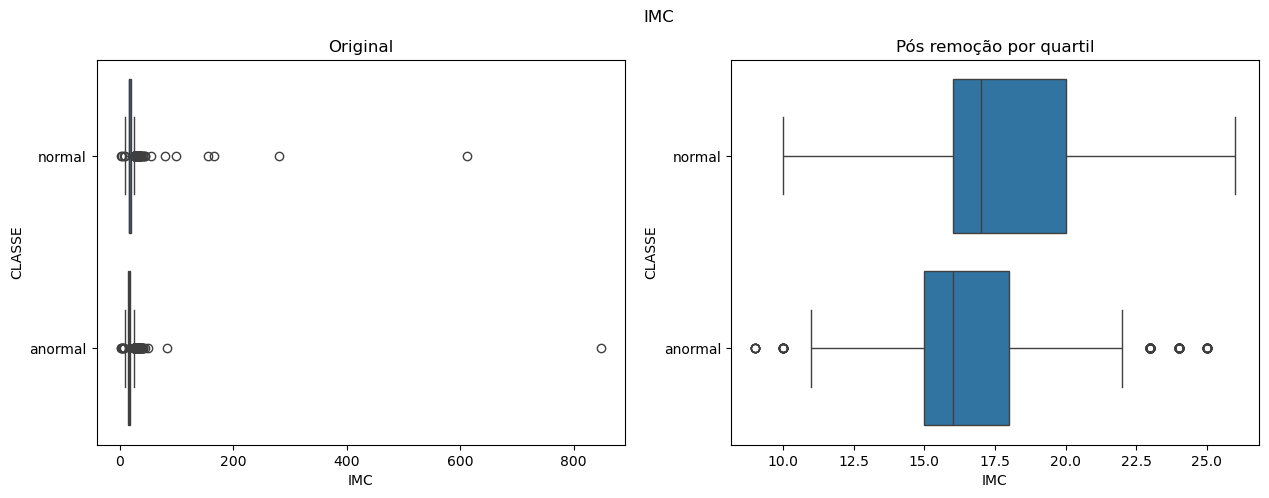

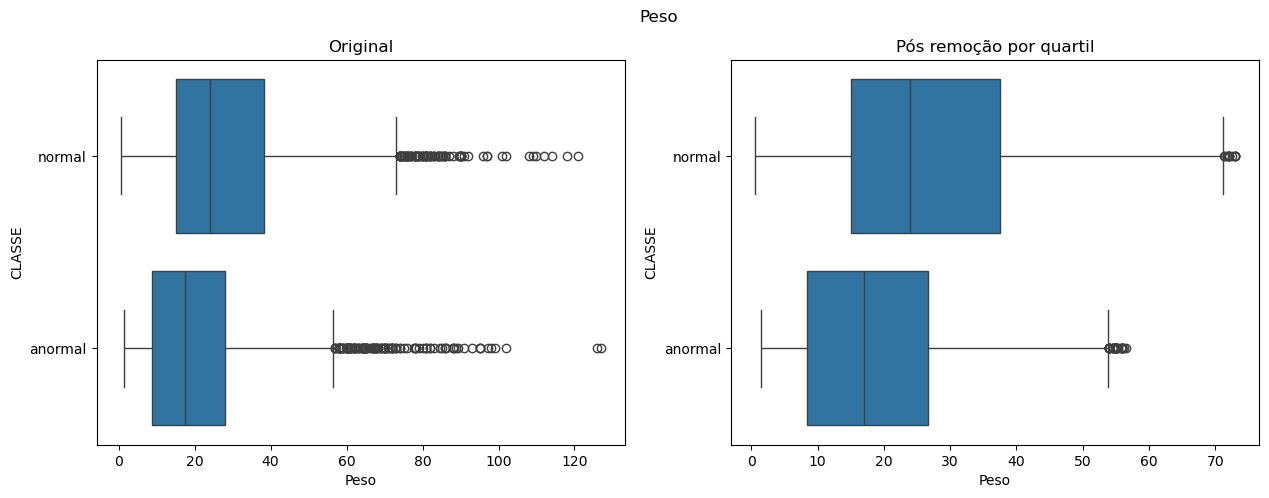

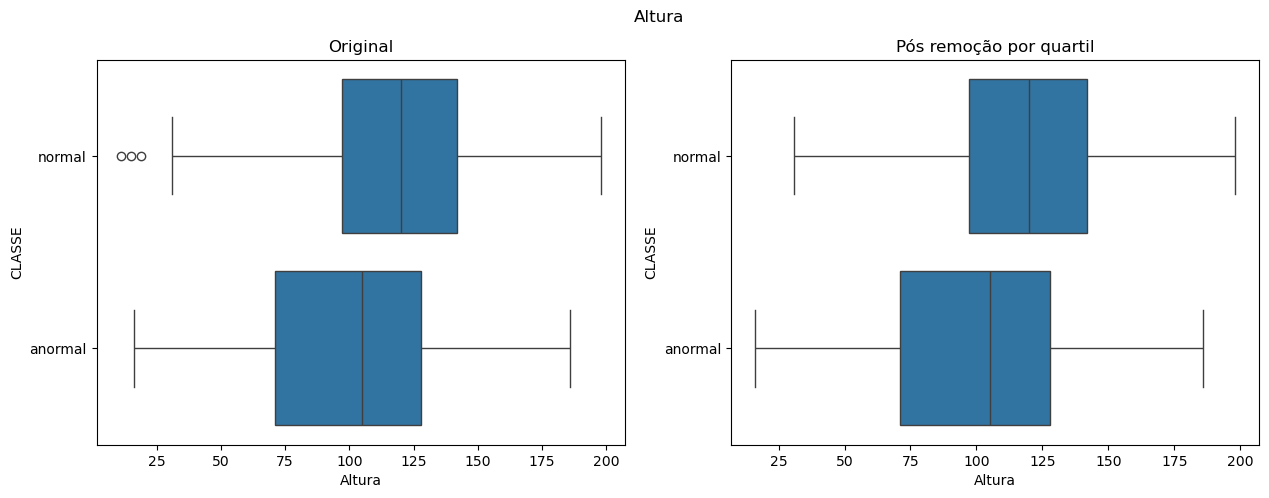

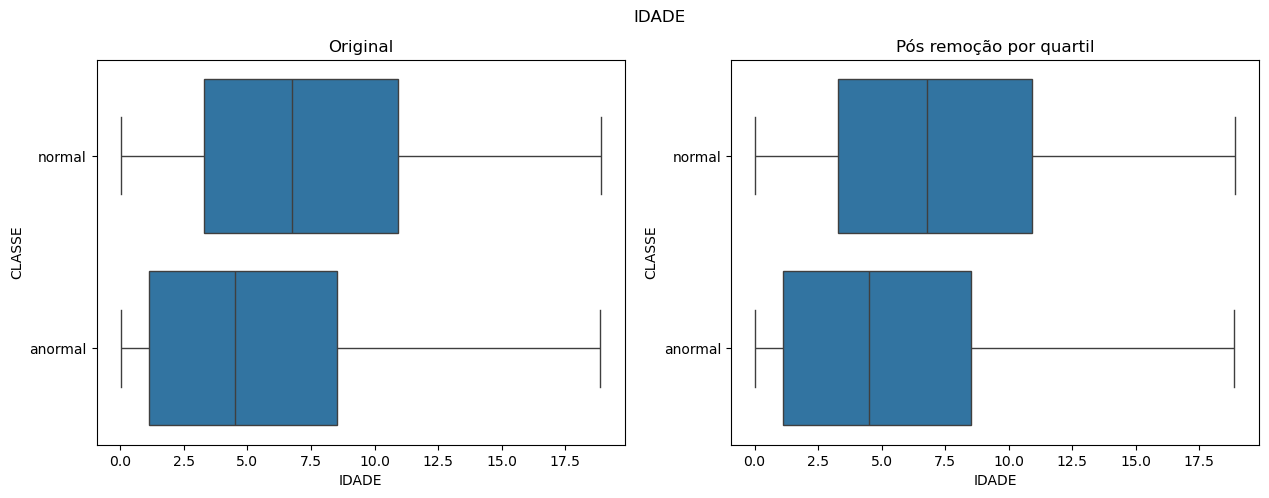

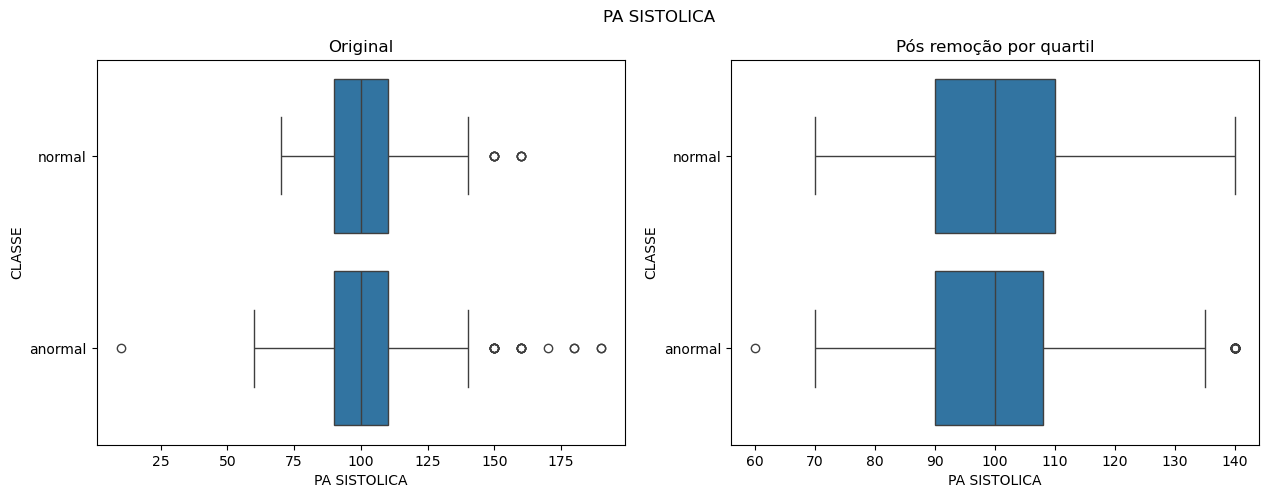

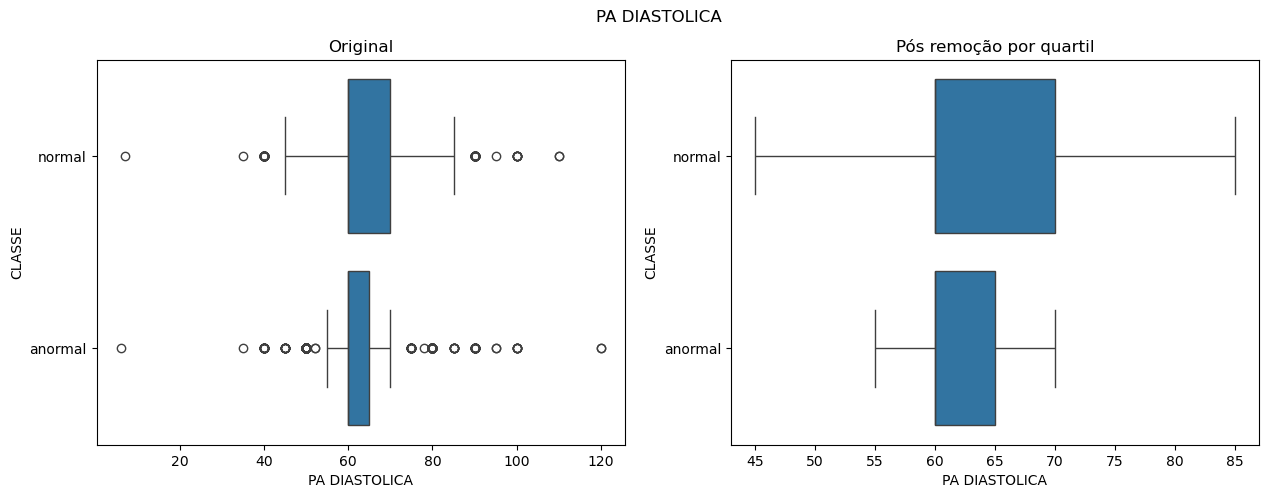

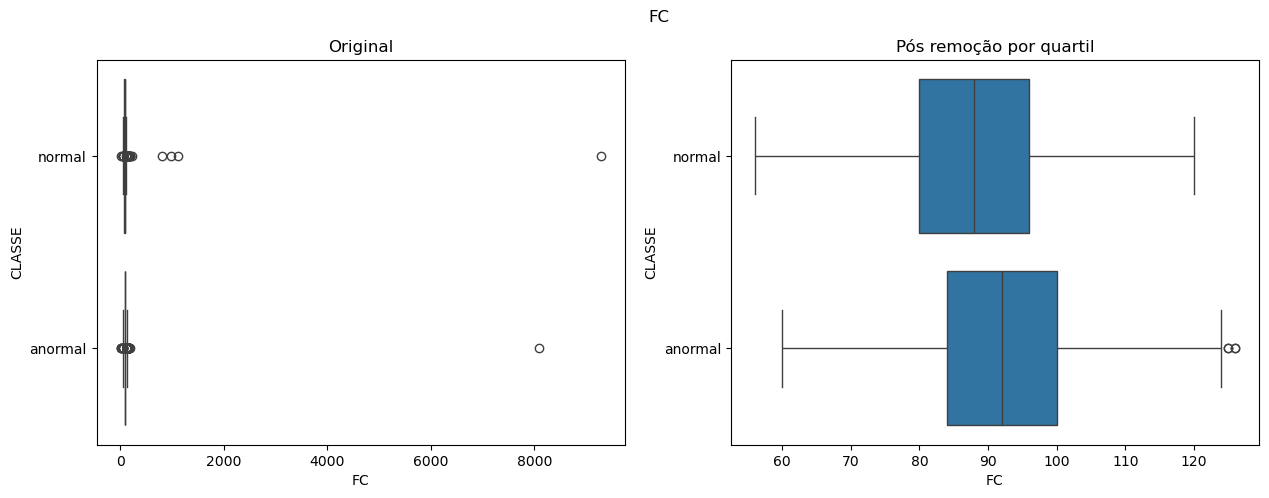

In [37]:
# IDENTIFICAR OUTLIERS SEM CONSIDERAR RELAÇÃO ENTRE ATRIBUTOS

# identificação de outliers por atributo (método boxplot modificado)
df_aux1 = invalidar_outliers_quartil(df_train, col_numerica)

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"{coluna}")
    
    sns.boxplot(df_train, x=coluna, y='CLASSE', ax=axes[0])
    axes[0].set_title(f"Original")

    sns.boxplot(df_aux1, x=coluna, y='CLASSE', ax=axes[1])
    axes[1].set_title(f"Pós remoção por quartil")
    plt.show()

df_train = df_aux1


In [38]:
# EXCLUIR REGISTROS COM MENOS DE 30% DOS VALORES PREENCHIDOS 

analise_registro_incompleto(df_train, 0.3)
df_train = remover_registros_incompletos(df_train, 0.3).reset_index(drop=True)

print("Conjunto de treino sem registros com baixa taxa de preenchimento: ", df_train.shape)

98 de 10215 (0.9593734703866862%) registros com mais de 30.0% dos atributos faltantes
Conjunto de treino sem registros com baixa taxa de preenchimento:  (10117, 15)


In [39]:
# GERANDO DIFERENTES IMPUTADORES (fit feito com conjunto de treino!)

imputador_5nn = imputador_faltantes_knn(df_train, col_numerica, 5)
imputador_media = imputador_faltantes_media(df_train, col_numerica)
imputador_mediana = imputador_faltantes_mediana(df_train, col_numerica)

imputador_moda = imputador_faltantes_moda(df_train, col_categorica)
imputador_constante = imputador_faltantes_constante(df_train, col_categorica)


In [40]:
# IMPUTANDO DADOS NUMÉRICOS

df_train_imputed_5nn = pd.DataFrame(imputador_5nn.transform(df_train[col_numerica]), columns=col_numerica)
df_train_imputed_media = pd.DataFrame(imputador_media.transform(df_train[col_numerica]), columns=col_numerica)
df_train_imputed_mediana = pd.DataFrame(imputador_mediana.transform(df_train[col_numerica]), columns=col_numerica)

Relação de atributos e porcentagem de nulos: 


,qtd,%
IMC,333.0,3.291490
Peso,231.0,2.283286
Altura,3.0,0.029653
IDADE,501.0,4.952061
PA SISTOLICA,3776.0,37.323317
PA DIASTOLICA,4335.0,42.848671
FC,890.0,8.797074


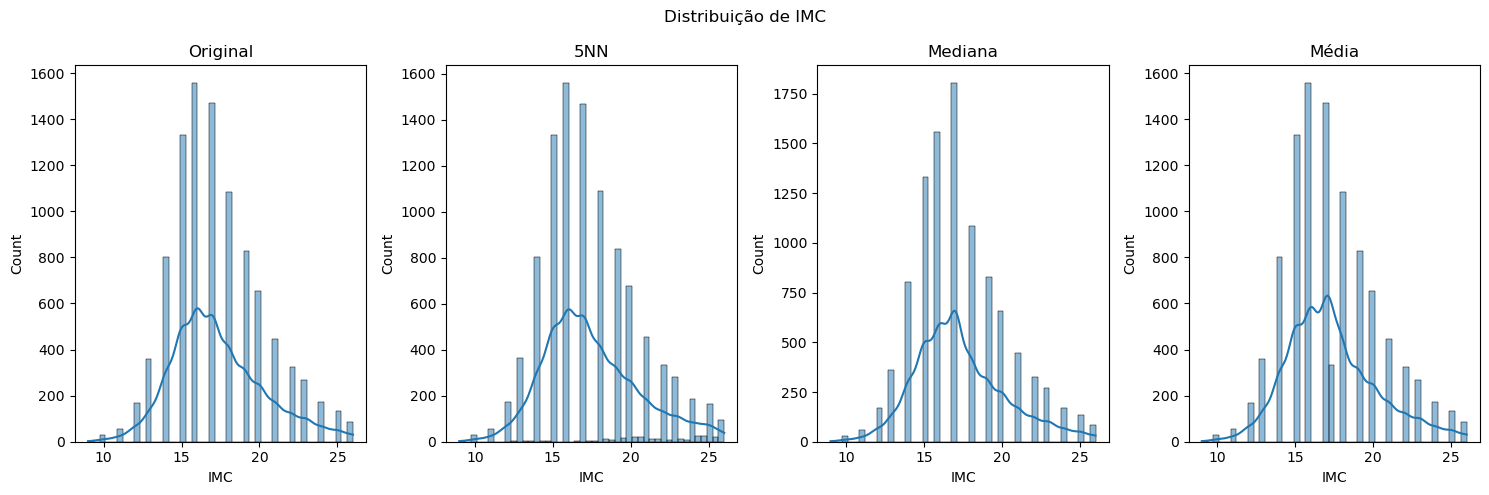

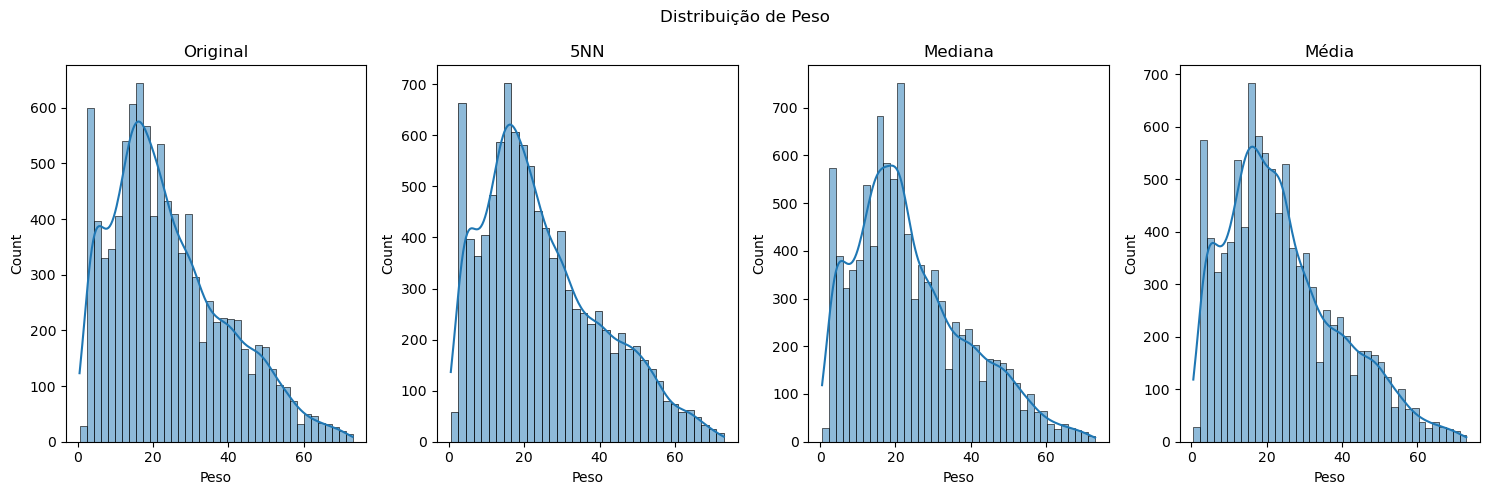

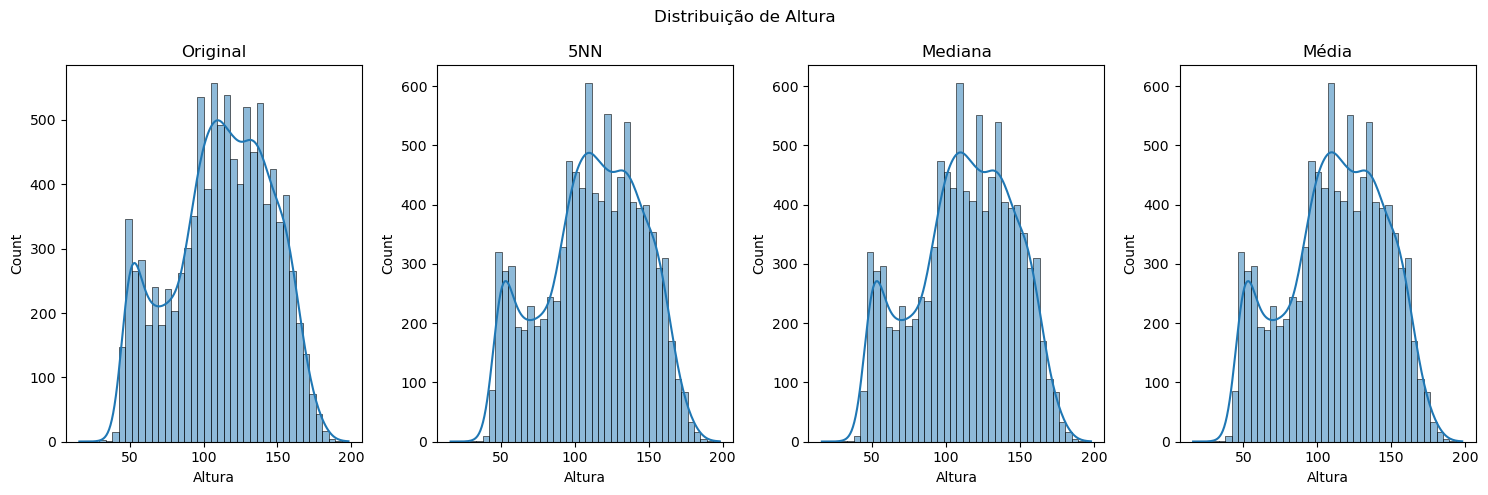

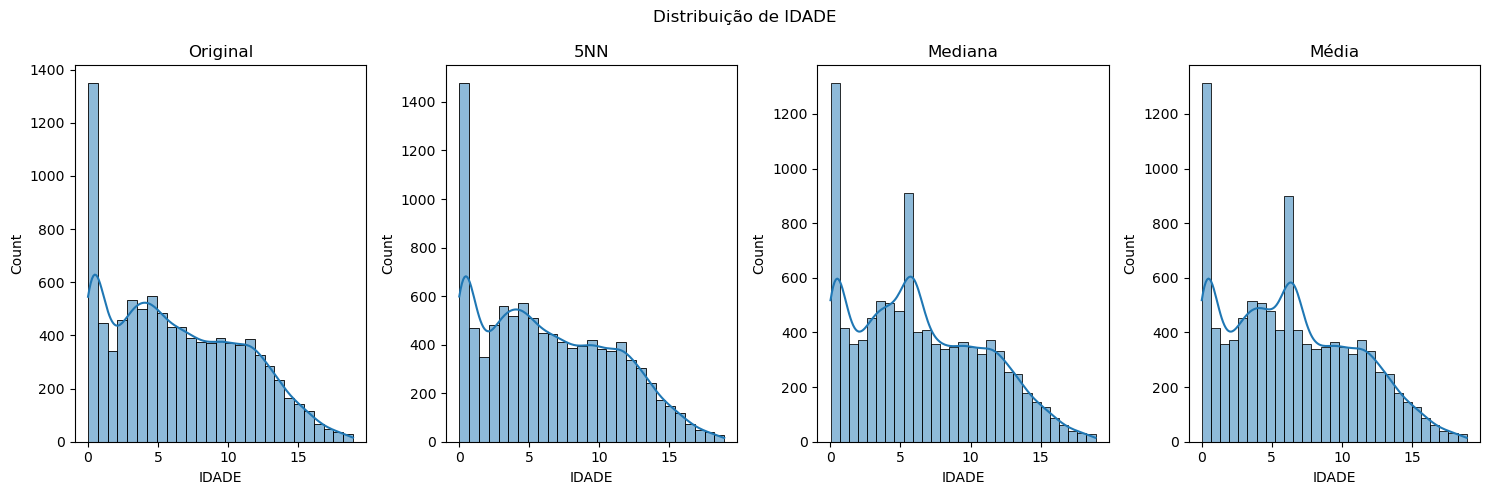

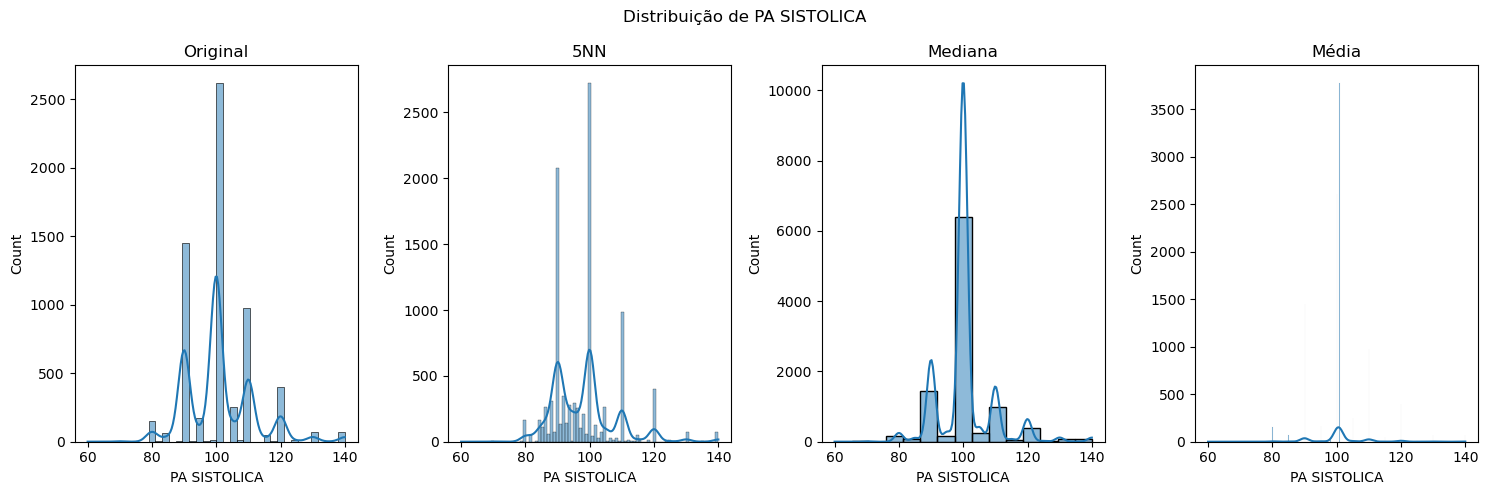

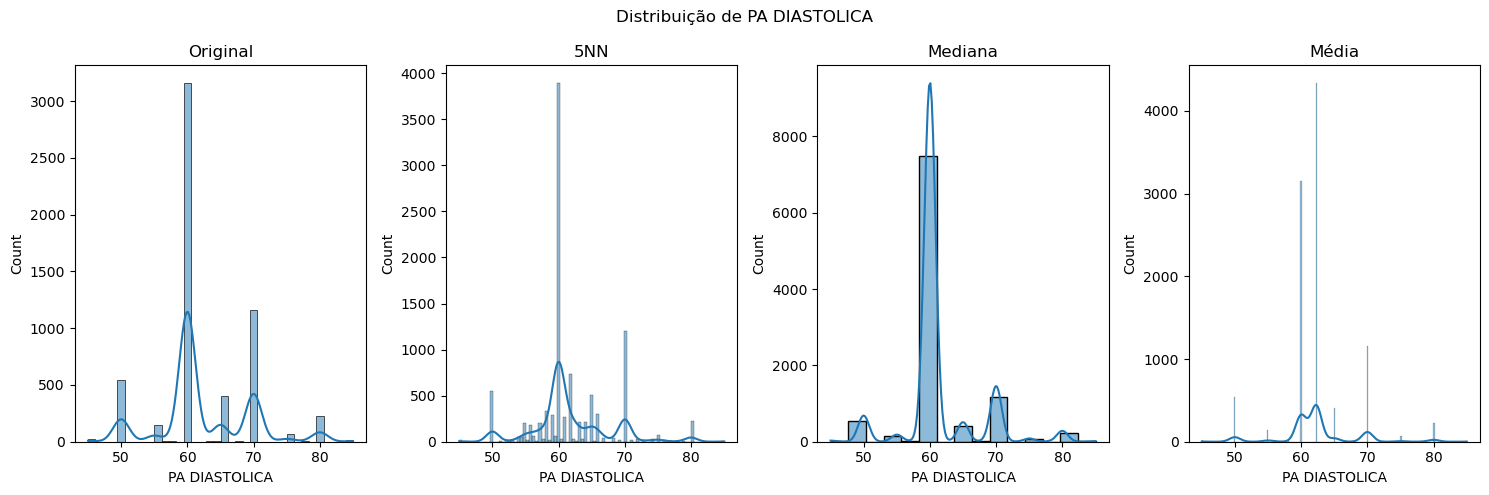

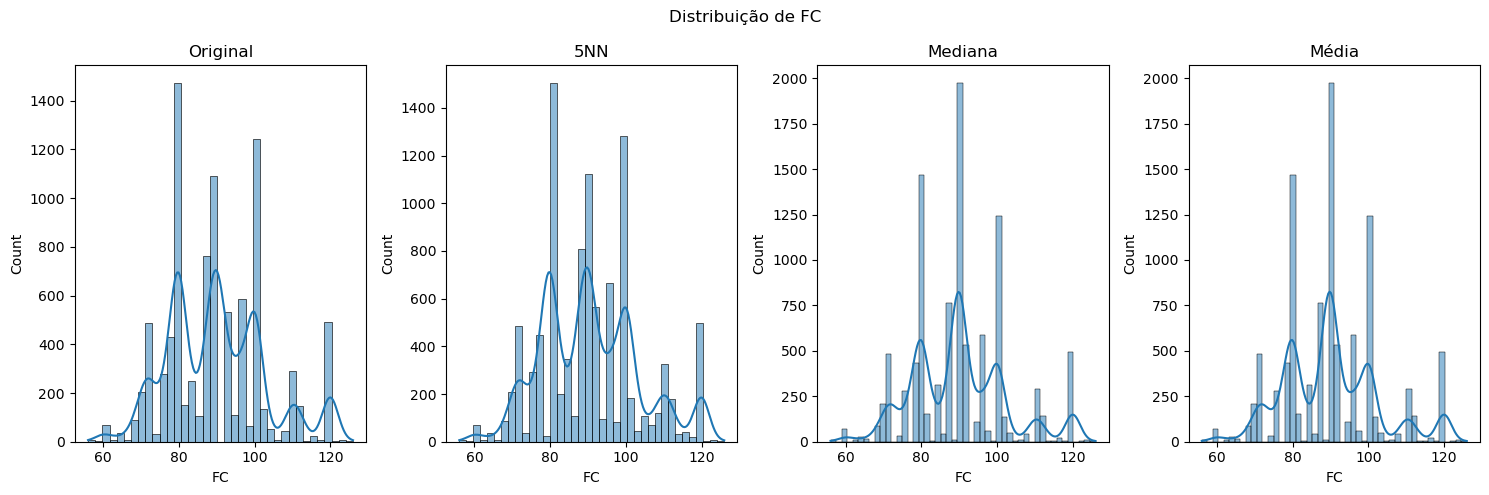

In [41]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS

analise_valores_faltantes(df_train[col_numerica])

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.histplot(df_train[coluna], ax=axes[0], kde=True)
    axes[0].set_title(f"Original")

    sns.histplot(df_train_imputed_5nn[coluna], ax=axes[1], kde=True)
    axes[1].set_title(f"5NN")
    
    sns.histplot(df_train_imputed_mediana[coluna], ax=axes[2], kde=True)
    axes[2].set_title(f"Mediana")
    
    sns.histplot(df_train_imputed_media[coluna], ax=axes[3], kde=True)
    axes[3].set_title(f"Média")

    plt.tight_layout()    
    plt.show()

In [42]:
# IMPUTANDO DADOS CATEGÓRICOS

df_train_imputed_constante = pd.DataFrame(imputador_constante.transform(df_train[col_categorica]), columns=col_categorica)
df_train_imputed_moda = pd.DataFrame(imputador_moda.transform(df_train[col_categorica]), columns=col_categorica)

Relação de atributos e porcentagem de nulos: 


,qtd,%
PULSOS,17.0,0.168034
B2,5.0,0.049422
SOPRO,0.0,0.000000
HDA 1,2306.0,22.793318
SEXO,269.0,2.658891
MOTIVO1,85.0,0.840170


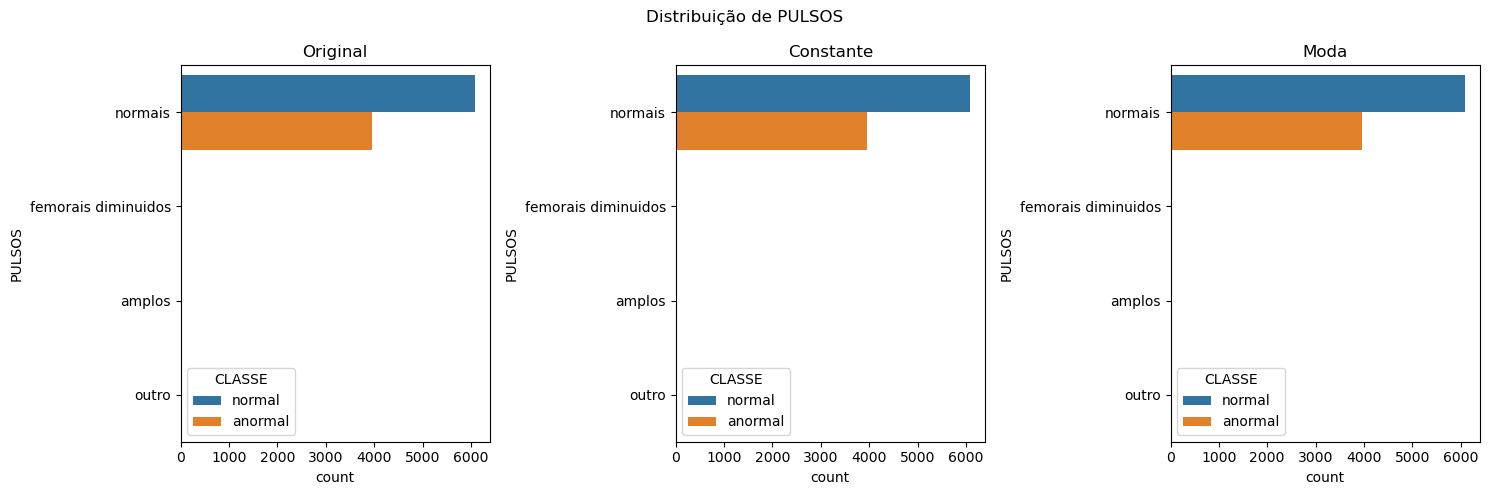

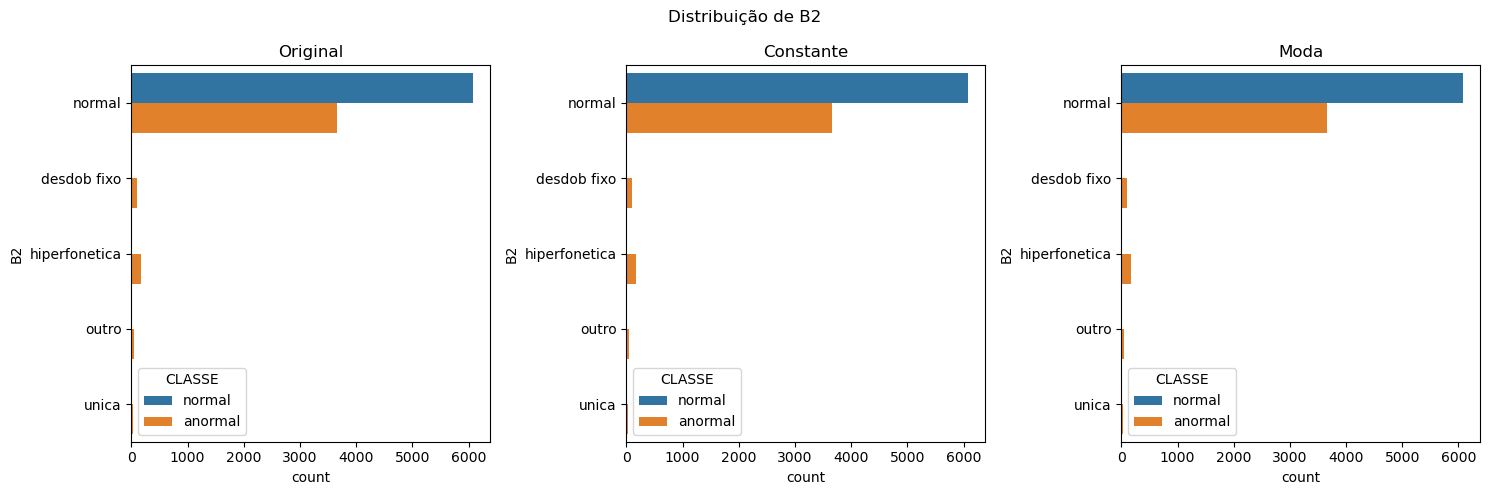

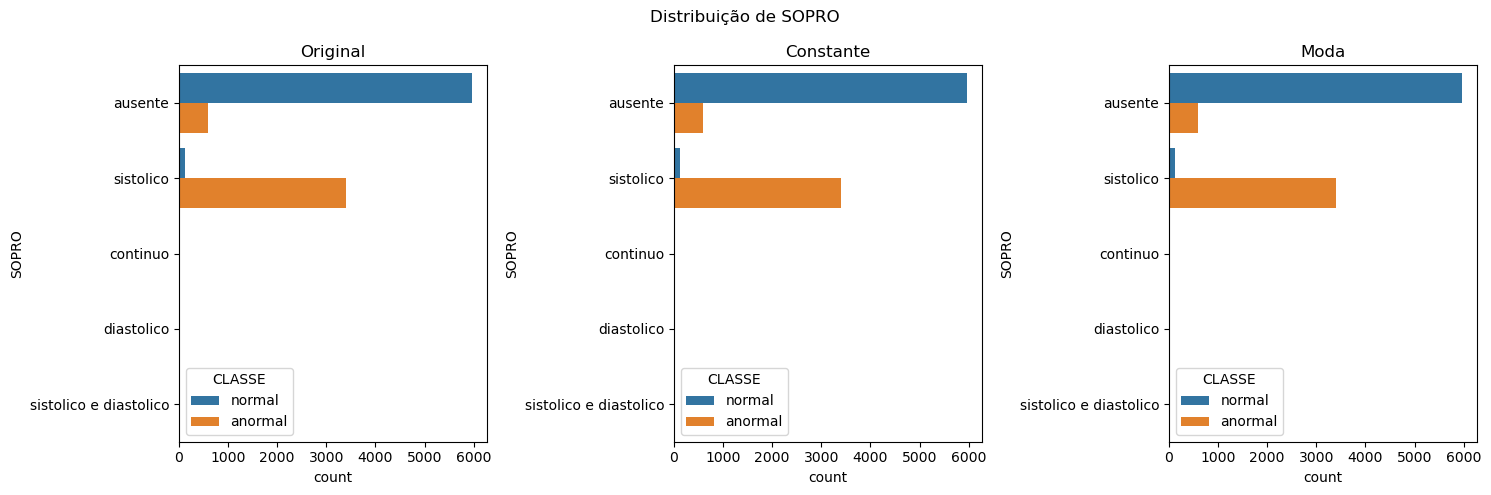

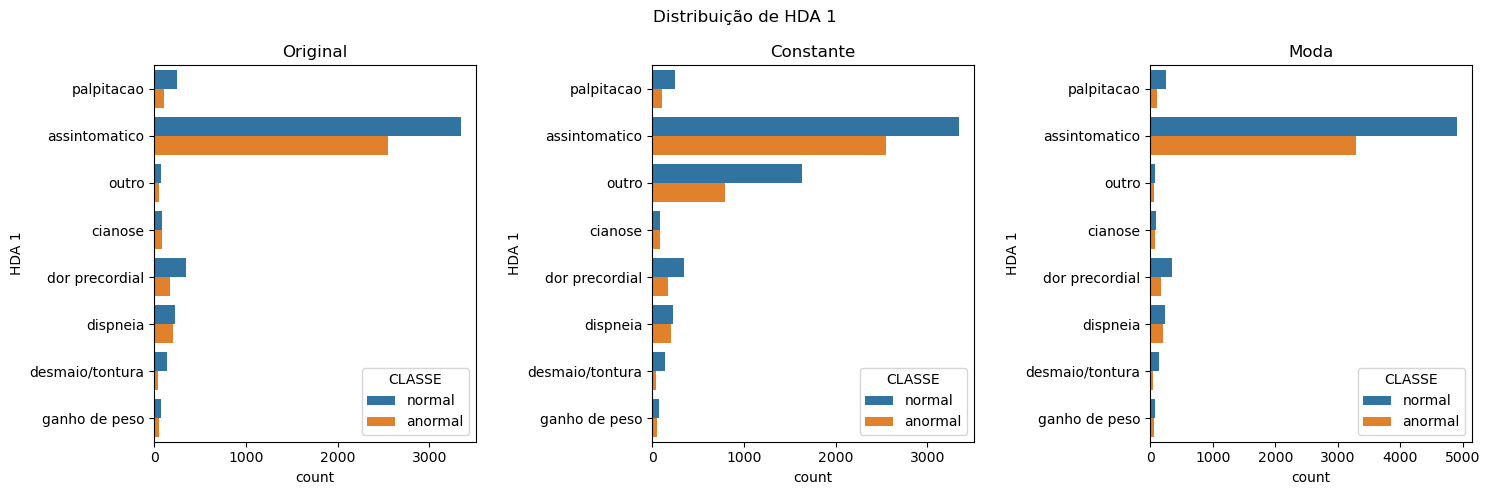

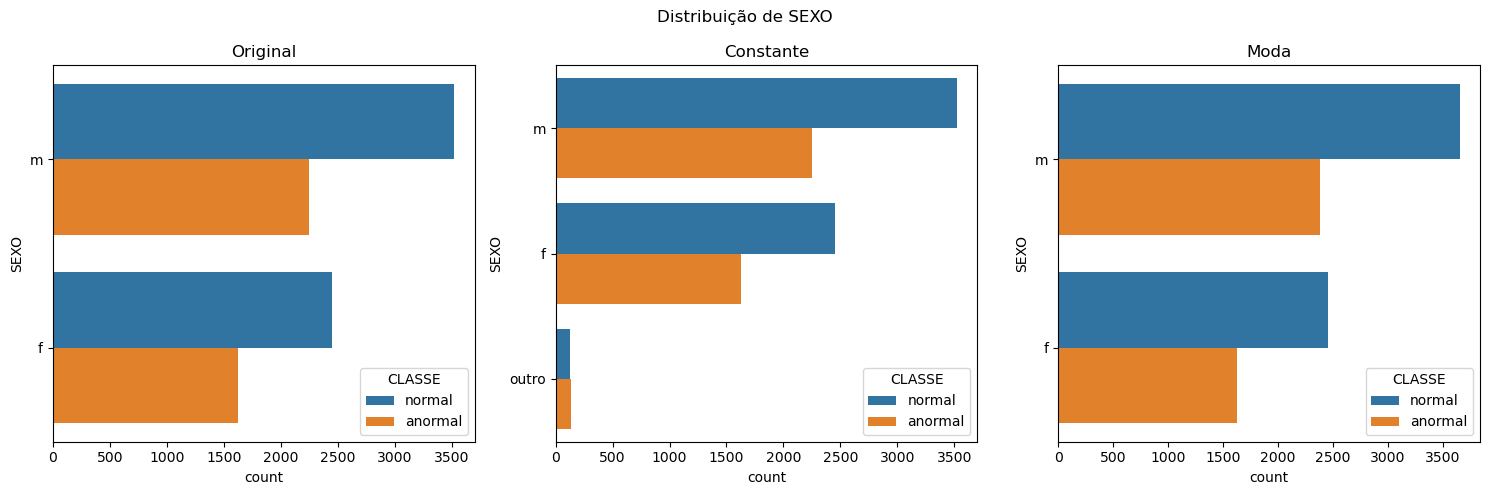

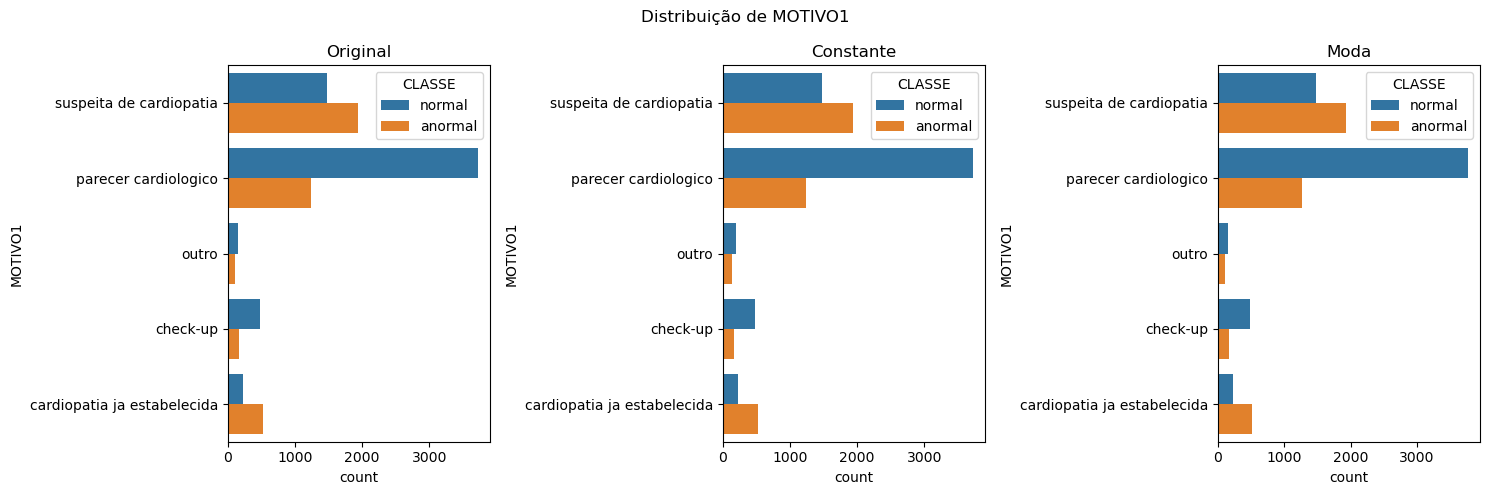

In [43]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS

df_train_imputed_constante = pd.concat([df_train_imputed_constante, df_train['CLASSE']], axis=1)
df_train_imputed_moda = pd.concat([df_train_imputed_moda, df_train['CLASSE']], axis=1)

analise_valores_faltantes(df_train[col_categorica])

for coluna in col_categorica:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")

    sns.countplot(df_train, y=coluna, ax=axes[0], hue='CLASSE')
    axes[0].set_title(f"Original")

    sns.countplot(df_train_imputed_constante, y=coluna, ax=axes[1], hue='CLASSE')
    axes[1].set_title(f"Constante")

    sns.countplot(df_train_imputed_moda, y=coluna, ax=axes[2], hue='CLASSE')
    axes[2].set_title(f"Moda")

    plt.tight_layout()    
    plt.show()


df_train_imputed_constante = df_train_imputed_constante.drop(columns=['CLASSE'])
df_train_imputed_moda = df_train_imputed_moda.drop(columns=['CLASSE'])

In [44]:
# ADOÇÃO DOS MELHORES IMPUTERS

# TREINO
df_train[col_numerica] = df_train_imputed_5nn
df_train[col_categorica] = df_train_imputed_constante

# TESTE
df_test[col_numerica] = pd.DataFrame(imputador_5nn.transform(df_test[col_numerica]), columns=col_numerica)
df_test[col_categorica] = pd.DataFrame(imputador_moda.transform(df_test[col_categorica]), columns=col_categorica)


In [45]:
# EXLUIR DUPLICATAS (mesmos valores de atributos e mesma classifiação)

df_train = remover_duplicatas(df_train).reset_index(drop=True)
print("Conjunto de treino sem duplicatas: ", df_train.shape)

Conjunto de treino sem duplicatas:  (10061, 15)


In [46]:
# EXCLUIR INCONSISTÊNCIAS (mesmos valores de atributos e classificação diferente)

df_train = remover_inconsistencia(df_train).reset_index(drop=True)
print("Registros de treino sem inconsistências: ", df_train.shape)

Registros de treino sem inconsistências:  (10061, 15)


In [47]:
# CRIANDO NOVOS ATRIBUTOS (FC_Categoria)

df_train = criar_novos_atributos(df_train)
df_test = criar_novos_atributos(df_test)

# +["FC_Categoria"]

In [48]:
# GERANDO CODIFICADORES (fit feito com conjunto de treino!)

# codificador ordinal (com relação de ordem)
codificador_ordinal = codificador_ordinais(df_train, col_ordinal, col_ordinal_categorias) 

# codificador nominal (sem relações de ordem)
codificador_oneHot = codificador_nominais(df_train, col_nominal+["FC_Categoria"])


In [49]:
# TRANSFORMÇÃO SIMBÓLICO NUMÉRICO

# TREINO
df_train[col_ordinal] = pd.DataFrame(codificador_ordinal.transform(df_train[col_ordinal]), columns=col_ordinal)

df_train_encoded_nominal = pd.DataFrame(codificador_oneHot.transform(df_train[col_nominal+["FC_Categoria"]]), columns=codificador_oneHot.get_feature_names_out(col_nominal+["FC_Categoria"]))
# separação temporária da coluna CLASSE para preservar a ordem 
classes = df_train["CLASSE"]
df_train = df_train.drop(columns=["PULSOS", "B2", "SOPRO", "SEXO", "CLASSE"]+["FC_Categoria"])
# concatenação das novas colunas seguidas pela CLASSE
df_train = pd.concat([df_train, df_train_encoded_nominal], axis=1)
df_train = pd.concat([df_train, classes], axis=1)


# TESTE
df_test[col_ordinal] = pd.DataFrame(codificador_ordinal.transform(df_test[col_ordinal]), columns=col_ordinal)

df_test_encoded_nominal = pd.DataFrame(codificador_oneHot.transform(df_test[col_nominal+["FC_Categoria"]]), columns=codificador_oneHot.get_feature_names_out(col_nominal+["FC_Categoria"]))
df_test = df_test.drop(columns=["PULSOS", "B2", "SOPRO", "SEXO"]+["FC_Categoria"])
df_test = pd.concat([df_test, df_test_encoded_nominal], axis=1)

In [50]:
# CODIFICANDO ATRIBUTO ALVO 

df_train['CLASSE'] = df_train['CLASSE'].apply(lambda x: 0 if x in ['normal'] else 1 if x in ['anormal'] else np.nan)

In [51]:
# ANALISANDO CORRELAÇÃO

matriz_correlacao(df_train, col_numerica)

,IMC,Peso,Altura,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
IMC,1.000000,0.651346,0.415387,0.391301,0.448383,0.303133,-0.265615
Peso,0.651346,1.000000,0.919511,0.901525,0.660100,0.375980,-0.595077
Altura,0.415387,0.919511,1.000000,0.935336,0.607953,0.272229,-0.667356
IDADE,0.391301,0.901525,0.935336,1.000000,0.583702,0.298035,-0.620965
PA SISTOLICA,0.448383,0.660100,0.607953,0.583702,1.000000,0.615040,-0.381064
PA DIASTOLICA,0.303133,0.375980,0.272229,0.298035,0.615040,1.000000,-0.086195
FC,-0.265615,-0.595077,-0.667356,-0.620965,-0.381064,-0.086195,1.000000


In [52]:
# GERAR NORMALIZADOR (fit feito com conjunto de treino!)

normalizador_padrao = normalizador(df_train, df_train.columns[1:-1])

In [53]:
# NORMLAIZAR ATRIBUTOS

# TREINO
df_train.iloc[:, 1:-1] = pd.DataFrame(normalizador_padrao.transform(df_train.iloc[:, 1:-1]), columns=df_train.columns[1:-1])

# TESTE
df_test.iloc[:, 1:] = pd.DataFrame(normalizador_padrao.transform(df_test.iloc[:, 1:]), columns=df_test.columns[1:])

In [54]:
# CONJUNTO PÓS PREPROCESSAMENTO

display(df_train.iloc[:, 1:-1])
display(df_test.iloc[:, 1:])

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,HDA 1,MOTIVO1,PULSOS_amplos,...,SOPRO_continuo,SOPRO_diastolico,SOPRO_sistolico,SOPRO_sistolico e diastolico,SEXO_f,SEXO_m,SEXO_outro,FC_Categoria_bradicardia,FC_Categoria_normal,FC_Categoria_taquicardia
0,0.204504,0.332486,0.490953,-0.129654,1.213365,3.097425,0.729028,-0.095165,-0.512077,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
1,-0.754215,-0.744923,-0.159552,-0.898433,-0.196505,-1.322466,0.729028,-0.764250,-0.512077,-0.04991,...,-0.04463,-0.01727,1.366754,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
2,1.124875,0.721550,1.791963,-1.360129,0.206315,-0.302492,-0.962091,-0.764250,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,4.103493,-4.017424,-0.047867
3,1.291053,1.469751,-0.159552,0.259030,2.220415,1.397467,-0.808353,-0.764250,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
4,-0.402685,-0.206219,-0.159552,-0.529075,-0.800736,-0.302492,0.114076,1.577545,-1.595343,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10056,-0.517731,-0.355859,-0.159552,-0.623562,-0.800736,-0.302492,2.266410,1.577545,-0.512077,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
10057,0.012760,0.422270,-0.484804,0.516721,0.206315,-0.302492,-1.115829,-0.764250,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
10058,0.332334,0.033206,1.791963,-0.305743,0.709840,1.397467,0.114076,0.573919,-0.512077,-0.04991,...,-0.04463,-0.01727,1.366754,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
10059,0.063892,0.541982,-0.810057,0.278357,-0.800736,-1.152471,-0.962091,-0.764250,-0.512077,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867


,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,HDA 1,MOTIVO1,PULSOS_amplos,...,SOPRO_continuo,SOPRO_diastolico,SOPRO_sistolico,SOPRO_sistolico e diastolico,SEXO_f,SEXO_m,SEXO_outro,FC_Categoria_bradicardia,FC_Categoria_normal,FC_Categoria_taquicardia
0,-1.297490,-1.732548,-0.810057,-1.340802,-1.203556,-0.404489,1.497719,0.573919,-2.678608,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
1,1.124875,1.140542,0.490953,1.296236,0.810545,-0.302492,-0.500877,-0.764250,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
2,-0.428251,-0.236147,-0.159552,-0.552697,3.227466,4.797383,0.729028,1.243003,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
3,-1.092963,-1.307570,-0.289653,-1.216252,-0.397916,-0.812479,0.575290,-0.764250,1.654454,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,4.103493,-4.017424,-0.047867
4,-0.562471,0.518040,-0.224602,-0.516191,0.709840,-0.370490,-0.039662,-0.764250,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,0.020430,0.206788,-0.159552,0.278357,0.206315,1.397467,-1.423306,-0.764250,-2.678608,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
3142,-0.063937,0.254673,-0.679956,0.673483,-0.800736,-2.002450,-0.654615,0.239377,-0.512077,-0.04991,...,-0.04463,-0.01727,1.366754,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
3143,1.354968,1.170470,0.816205,1.596876,2.220415,-0.302492,0.421552,0.573919,-0.512077,-0.04991,...,-0.04463,-0.01727,1.366754,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
3144,-1.344787,-1.852260,-0.419754,-1.348104,-0.599326,0.037500,3.265707,-0.764250,-0.512077,-0.04991,...,-0.04463,-0.01727,1.366754,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867


---
### Experimentação e Análise de Resultados

Primeiro será feita uma visualização dos dados do dataset em duas e três dimensões através do PCA, diminuindo o número de colunas e possibilitando a criação de um gráfico com as mesmas.

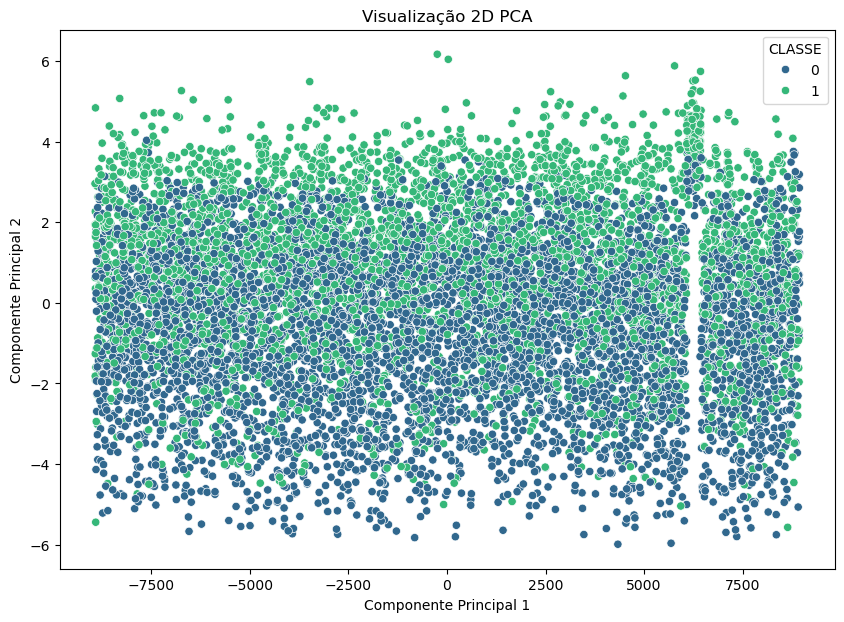

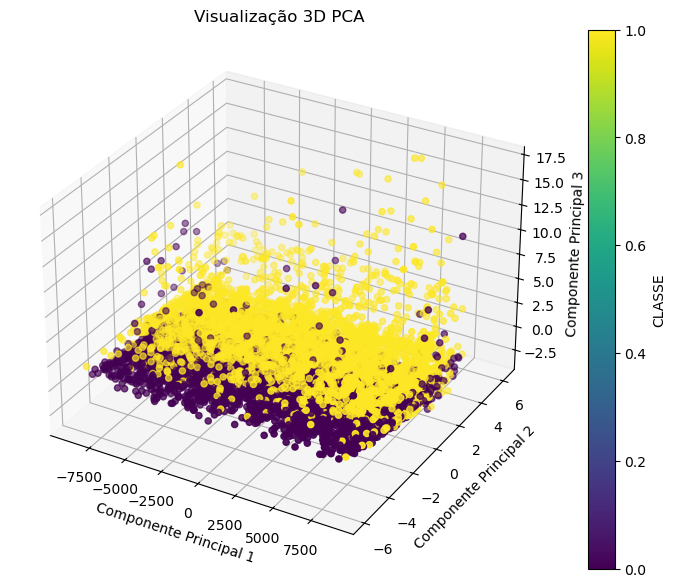

,PC1,PC2,PC3,CLASSE
0,1595.594270,-1.589428,-0.187860,0
1,-4445.405711,2.143311,0.049571,1
2,2723.594250,-0.716300,-1.489083,0
3,6501.594257,-2.996639,-0.089015,0
4,-7905.405729,0.514525,-0.657068,0
...,...,...,...,...
10056,744.594276,1.267306,-0.615844,0
10057,-5905.405737,-0.879018,-0.412297,0
10058,-5679.405735,-0.481573,1.509260,1
10059,-5721.405727,-0.295935,-1.240423,0


In [55]:
# ANALISE DOS DADOS COM PCA

plot_pca(df_train, dim=2, col_classe='CLASSE')
plot_pca(df_train, dim=3, col_classe='CLASSE')

Baseado em ambos os gráficos acima, podmeos observar que, no geral, pacientes saudáveis apresentam componentes principais com valores menores do que pacientes com cardiopatias, que, no gráfico 3D apresentam um componente 3 bem mais alto do que os pacientes saudáveis.


---

Em seguida os valores de `df_train` e `df_test` serão particionados para vetores do NumPy para facilitar o trabalho futuro com 80% dos valores para treino e 20% dos valores para teste. 

In [56]:
# GUARDAR DATAFRAME EM MATRIZES
from sklearn.model_selection import train_test_split

# realizando a partição do conjunto de treino em treino (80%) e validação (20%)
X_train, X_val, y_train, y_val = train_test_split(df_train.iloc[:, 1:-1].values, df_train.iloc[:, -1].values, test_size=0.2, random_state=10)

X_test = df_test.iloc[:, 1:].values

Por fim, vamos testar os melhores parâmetros com `GridSearchSV`, nota-se que os parâmetros de SVC não foram testados por conta do grande custo computacional. 

Avaliando KNN...
Melhores parâmetros para KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


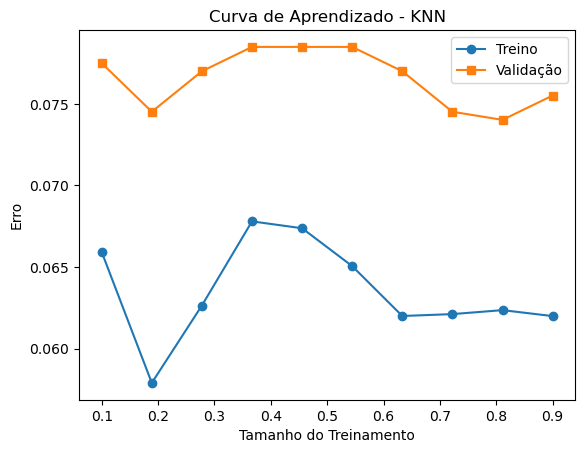

Accuracy: 0.9245
AUC-ROC: 0.9325
Confusion Matrix:
[[1174   33]
 [ 119  687]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1207
           1       0.95      0.85      0.90       806

    accuracy                           0.92      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.92      0.92      2013

Avaliando Naive Bayes...


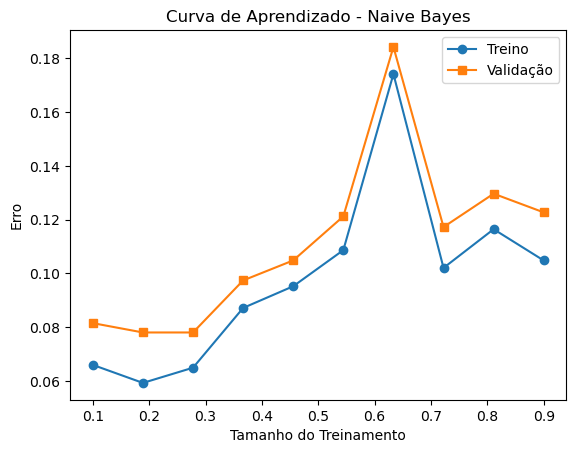

Accuracy: 0.8773
AUC-ROC: 0.9211
Confusion Matrix:
[[1178   29]
 [ 218  588]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1207
           1       0.95      0.73      0.83       806

    accuracy                           0.88      2013
   macro avg       0.90      0.85      0.87      2013
weighted avg       0.89      0.88      0.87      2013

Avaliando Logistic Regression...
Melhores parâmetros para Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


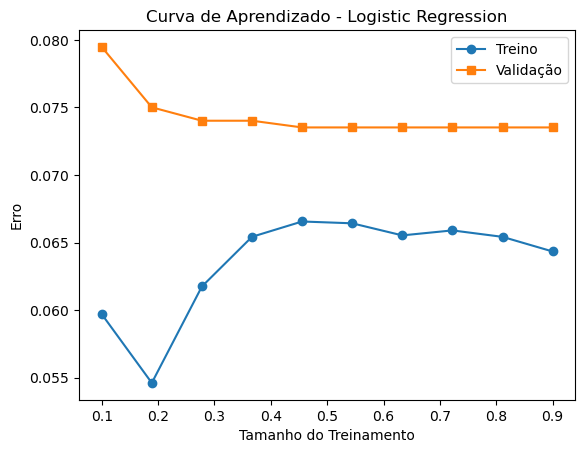

Accuracy: 0.9265
AUC-ROC: 0.9415
Confusion Matrix:
[[1179   28]
 [ 120  686]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1207
           1       0.96      0.85      0.90       806

    accuracy                           0.93      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.93      0.93      2013

Avaliando Random Forest...
Melhores parâmetros para Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 500}


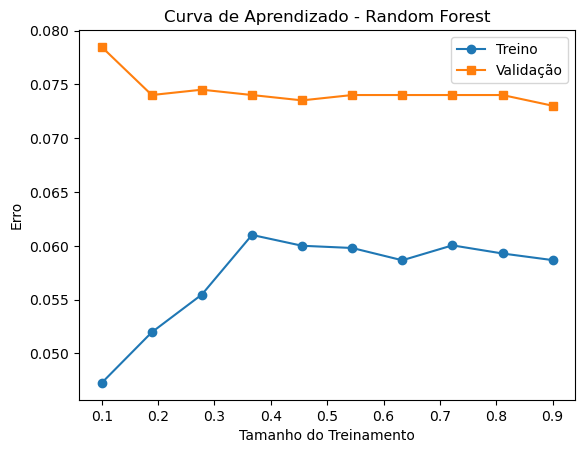

Accuracy: 0.9270
AUC-ROC: 0.9545
Confusion Matrix:
[[1179   28]
 [ 119  687]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1207
           1       0.96      0.85      0.90       806

    accuracy                           0.93      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.93      0.93      2013

Avaliando Gradient Boosting...
Melhores parâmetros para Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


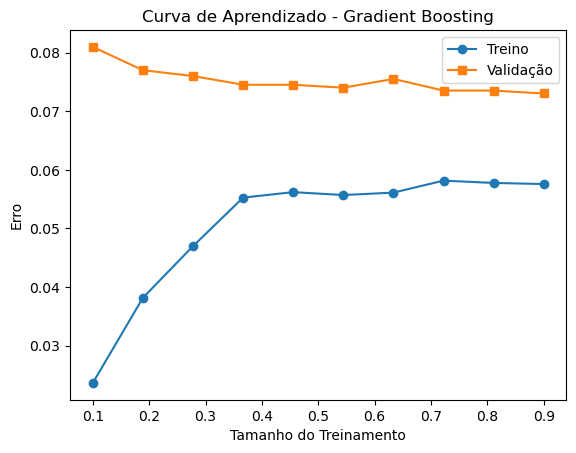

Accuracy: 0.9270
AUC-ROC: 0.9562
Confusion Matrix:
[[1179   28]
 [ 119  687]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1207
           1       0.96      0.85      0.90       806

    accuracy                           0.93      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.93      0.93      2013

Avaliando Neural Network...
Melhores parâmetros para Neural Network: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (30,)}


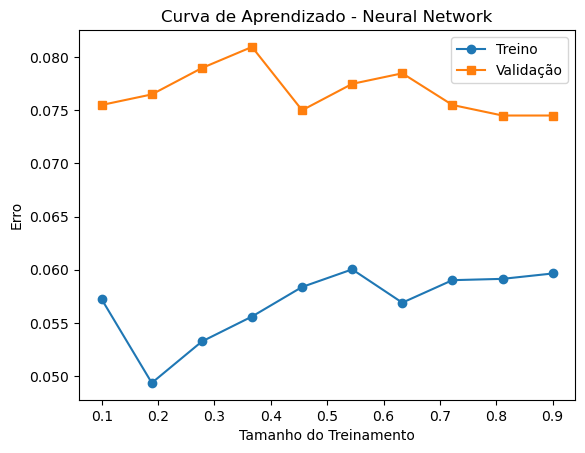

Accuracy: 0.9255
AUC-ROC: 0.9459
Confusion Matrix:
[[1177   30]
 [ 120  686]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1207
           1       0.96      0.85      0.90       806

    accuracy                           0.93      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.93      0.92      2013

Avaliando SVM...


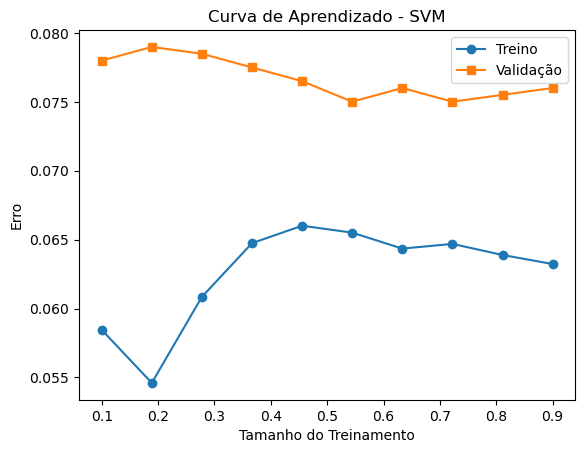

Accuracy: 0.9240
AUC-ROC: 0.9226
Confusion Matrix:
[[1172   35]
 [ 118  688]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1207
           1       0.95      0.85      0.90       806

    accuracy                           0.92      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.92      0.92      2013



In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# parâmetros para ajuste
param_grids = {
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "metric": ['euclidean', 'manhattan', 'minkowski'],
        "weights": ["uniform", "distance"] 
    },
    "Naive Bayes": {},  
    "Logistic Regression": {
        "C": [0.1, 1, 10], # inverso da regularização (1/lambda)
        "solver": ["liblinear"],
        "penalty": ["l1", "l2"] 
    },
    "Random Forest": {
        "n_estimators": [100, 200, 500],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 500],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "Neural Network": {
        "hidden_layer_sizes": [(50,), (30,), (20,)], 
        "activation": ["relu"],
        "alpha": [0.00001, 0.0001]
    },
    "SVM":  {} # Não serão calculados os melhores parâmetros por conta do gasto computacional
}


# modelos
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(max_iter=10000, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}


results = avaliar_modelos(models, param_grids, X_train, y_train, X_val, y_val)

##### KNN
- Diferença conssistente de menos de 2% de erro entre curvas de treino e validação;
- Mais falsos positivos (119) do que falsos negativos (33), algo de extrema importância na indústria médica;
- Pouquíssima diferença entre Acurácia (92%) e AUC-ROC (93%).

##### Naive Bayes
- Diferença coonsistente de menos de 2% de erro entre curvas de treino e validação;
- Apresenta menos falsos negativos (29), porém mais falsos positivos (218);
- Diferença discrepante entre acurácia (87%) e AUC-ROC (92%).

##### Regressão Logística
- Diferença de erro começa como 2% e diminuí conforme o tamanho de treinamento aumenta, como o esperado;
- Apresenta menos falsos negativos (28) e falsos positivos similares ao KNN (120);
- Diferença entre Acurácia (92%) e AUC-ROC (94%) considerável.

##### Random Forest
- Começa com uma diferença de erro de 3% porém depois estabiliza para uma diferença de 1,5%;
- Falsos positivos (119) e falsos negativos (28);
- Diferença entre Acurácia (92%) e AUC-ROC (95%) considerável.

##### Gradient Boosting
- Começa com a maior diferença de erro, de mais de 5%, depois estabilizando para uma diferença de aproximadamente 2%;
- Falsos positivos (119) e falsos negativos (28);
- Diferença entre Acurácia (92%) e AUC-ROC (95%) considerável.

##### Neural Network
- Diferença de erro varia um pouco mas fica entre 2% e 3%;
- Falsos positivos (120) e falsos negativos (30);
- Diferença entre Acurácia (92%) e AUC-ROC (94%) considerável.

##### SVM
- Diferença de erro começa como 2% e diminui até ficar mais próxima de 1,5%;
- Falsos positivos (118) e falsos negativos (35), o maior número de falsos negativos;
- Pouquíssima diferença entre Acurácia (92%) e AUC-ROC (92%).

## Conclusão

O fato de tantos modelos apresentarem uma diferença consideravel entre acurácia e AUC-ROC é notável, já que indica o desbalanceamento de classes. Além disso podemos observar que todos os métodos exceto naive bayes conseguiu uma acurácia de aproximadamente 92%, apenas mudando o AUC-ROC, dentre os quais o Gradient Boosting, o Random Forest e a Regressão Logística foram os melhores. Todos os modelos também  apresentaram uma pouca diferença de erro entre treinamento e validação, com o maior entre eles sento 5% do Gradient Boosting, o que indica que não há nem overfitting nem underfitting, já que os valores de erro ficam em sua maioria abaixo de 7%, com a única excessão sendo no método de Naive Bayes.

Agora só resta realizar a predição e criar o arquivo de submissão do kaggle.

In [58]:
# PREDIÇÃO

modelo = LogisticRegression(C= 0.1, penalty= 'l1', solver= 'liblinear')
modelo.fit(X_train, y_train)
y_test = modelo.predict(X_test)

df_test_y = pd.DataFrame({'Id': df_test['Id'], 'Predicted': y_test})
df_test_y.to_csv('submissoes/submissionrRegLog.csv', index=False)